# Aprendizaje Automático - Práctica 0 - Introducción a Python, Matplotlib y NumPy

#### Bonus: 5 puntos (1 por ejercicio)

#### Fecha límite de entrega: 12 de Marzo a las 23:59

#### Entrega a través de https://pradogrado2223.ugr.es/

### Nombre completo: <mark>ALEJANDRO NIETO ALARCÓN</mark>



---







Este trabajo, cuya puntuación máxima será de 5 puntos (1 punto por cada uno de los cinco ejercicios), pretende servir como práctica y refuerzo de los conocimientos adquiridos en las primeras
sesiones prácticas, en donde se han introducido los principios de Python, Matplotlib y NumPy.

Límite de entrega: **12 de Marzo de 2023 a las 23:59 (PRADO)**

**Materiales a entregar**: única y exclusivamente este Notebook de Colab (fichero .ipynb). No es necesario entregar ninguna memoria externa, pero el código debe estar bien comentado, y todas las decisiones tomadas y el trabajo desarrollado deben documentarse suficientemente en celdas de texto. 

**Nota relativa a la entrega**: la entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final, dado que es altamente improbable que se extienda la fecha de entrega.  

**Nota relativa a la realización de los ejercicios**: se parte de la premisa de que estos ejercicios no son particularmente difíciles, y pretenden evaluar el dominio que posee el/la alumno/a a la hora de manejar Python, en general, y matplotlib y NumPy en particular. En este sentido, el objetivo no es proporcionar *más o menos* las mismas salidas que se muestran en las celdas de texto de este cuaderno, sino exactamente las mismas (mismos colores, mismos marcadores, mismas etiquetas, mismos estilos, etc.). Es decir, se recomienda ser lo más fiel posible a la salida esperada para cada ejercicio. 



---






In [1]:
# Importamos paquetes necesarios.
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import math


## Ejercicio 1: lectura y visualización de datos (Iris Flower)



*   Leer la base de datos de Iris que hay en scikit-learn. Véase https://scikit-learn.org/stable/datasets/toy_dataset.html. El  conjunto de datos de flor Iris (https://en.wikipedia.org/wiki/Iris_flower_data_set), introducido por Ronald Fisher en 1936, es clásico en aprendizaje automático. 
*   Obtener las características (datos de entrada $X$) y la clase ($y$).
*   Quedarse con las características segunda y cuarta. Recuérdese que en Python los índices comienzan en $0$. 
*   Visualizar con un Scatter Plot los datos, coloreando cada clase con un color diferente e indicando con una leyenda la clase a la que corresponde cada color. Más concretamente, el resultado debe ser exactamente el que se muestra en la celda de resultados que se incluye más abajo. Esta es la única salida que proporciona este ejercicio. No se debe mostrar ninguna otra información en la celda de resultados.





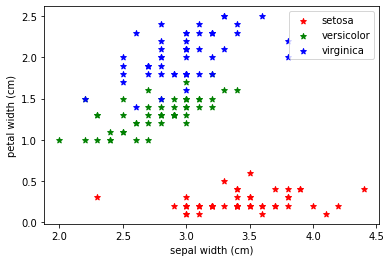

In [2]:
# Leemos el dataset
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(data = iris.data, columns = iris.feature_names)

## Guardamos a que clase pertenece cada muestra en una columna llamada 'y'
df_iris['y'] = iris.target

colors = ['red', 'green', 'blue']
for tipo in df_iris['y'].unique():
  ## El valor (x, y) en 'x' seleccionamos la caracteristica 1 por cada tipo y en 'y' seleccionamos la caracteristica 3 de cada tipo
  plt.scatter(df_iris[df_iris['y'] == tipo][df_iris.columns[1]], df_iris[df_iris['y'] == tipo][df_iris.columns[3]], c = colors[tipo], marker='*', label = iris.target_names[tipo])
plt.legend()
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width (cm)")
plt.show()

## Ejercicio 2: lectura y visualización de datos (Breast Cancer)

*   Leer la también clásica base de datos de Breast Cancer (introducida en los años 90) que hay en scikit-learn. Véase https://scikit-learn.org/stable/datasets/toy_dataset.html y https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer. 
*   Obtener las características (datos de entrada $X$) y la clase ($y$).
*   Quedarse con las características denominadas 'mean area' y 'mean texture'. Para identificarlas el alumno debe explorar el conjunto de datos y ver qué índices corresponden a dichas características.  
*   Visualizar con un Scatter Plot los datos, coloreando cada clase con un color diferente e indicando con una leyenda la clase a la que corresponde cada color. El resultado debe ser el que se muestra en la celda de resultados que se incluye más abajo. 


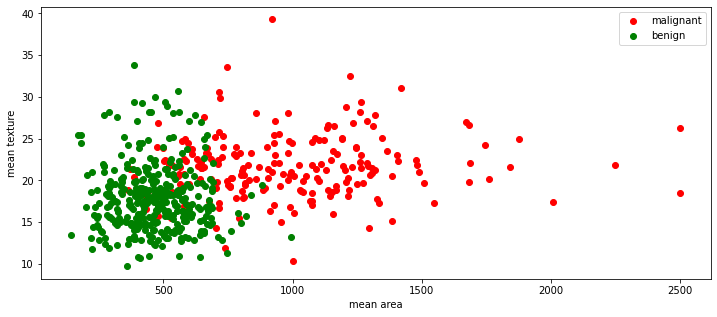

In [3]:
# Leemos el dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df_cancer = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

## Guardamos a que clase pertenece cada muestra en una columna llamada 'y'
df_cancer['y'] = cancer.target

# Separamos los datos según su clase
malignos = df_cancer[df_cancer['y'] == 0]
benignos = df_cancer[df_cancer['y'] == 1]

# Visualizamos los datos con un Scatter plot
colors = ['red', 'green']
plt.figure(figsize=(12,5))
for tipo in df_cancer['y'].unique():
  ## El valor (x, y) en 'x' seleccionamos la caracteristica 'mean area' por cada tipo y en 'y' seleccionamos la caracteristica 'mean texture' de cada tipo
  plt.scatter(df_cancer[df_cancer['y'] == tipo]['mean area'], df_cancer[df_cancer['y'] == tipo]['mean texture'], c=colors[tipo], label = cancer.target_names[tipo])
plt.xlabel('mean area')
plt.ylabel('mean texture')
plt.legend()
plt.show()



* Se debe mostrar también, tal y como se muestra en la celda de resultados, un histograma con la frecuencia de ejemplos de cada clase. También se debe imprimir el número de ejemplos por clase, formateado de la forma que se indica más abajo. 


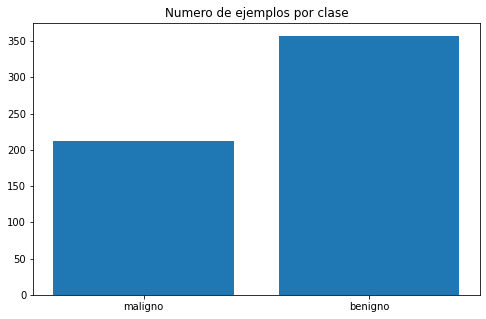

La clase "malignant" tiene 212 ejemplos
La clase "benignos" tiene 357 ejemplos


In [4]:
plt.figure(figsize=(8,5))
## El shape de un dataframe nos devuelve el valor de la matriz de la cual esta compuesto ej [4, 4] (filas, columnas) 
## si cogemos por cada dataframe de cada tipo el numero de filas que tiene tendremos un recuento de cuantas muestras hay
plt.bar([0, 1], [malignos.shape[0], benignos.shape[0]], tick_label =  ['maligno', 'benigno'])
plt.title('Numero de ejemplos por clase')
plt.show()
print('La clase "malignant" tiene', malignos.shape[0], 'ejemplos')
print('La clase "benignos" tiene', benignos.shape[0], 'ejemplos')


* Se debe visualizar también, de la forma en que se muestra más abajo, el diagnóstico resultante en función del 'mean radius'. Junto con ello, se deben imprimir los valores máximo y mínimo para cada una de las dos clases

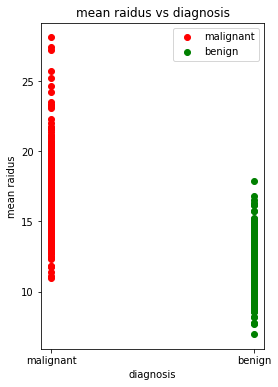

La clase "malignant" tiene para la variable "mean radius" presenta unos valores entre 10.95 y 28.11
La clase "benign" tiene para la variable "mean radius" presenta unos valores entre 6.981 y 17.85


In [5]:
plt.figure(figsize=(4,6))
for tipo in df_cancer['y'].unique():
  plt.scatter(df_cancer[df_cancer['y'] == tipo]['y'], df_cancer[df_cancer['y'] == tipo]['mean radius'], c=colors[tipo], label = cancer.target_names[tipo])
plt.xticks([0, 1], cancer.target_names)
plt.title('mean raidus vs diagnosis')
plt.ylabel("mean raidus")
plt.xlabel("diagnosis")
plt.legend()
plt.show()
print('La clase "malignant" tiene para la variable "mean radius" presenta unos valores entre', df_cancer[df_cancer['y'] == 0]['mean radius'].min(), 'y', df_cancer[df_cancer['y'] == 0]['mean radius'].max())
print('La clase "benign" tiene para la variable "mean radius" presenta unos valores entre', df_cancer[df_cancer['y'] == 1]['mean radius'].min(), 'y', df_cancer[df_cancer['y'] == 1]['mean radius'].max())


## Ejercicio 3: separación balanceada de conjuntos de entrenamiento y test

*   Partir de los datos de Iris (empleados en el Ejercicio 1), y separar en training (80\% de los datos) y test (20\%) aleatoriamente, conservando la proporción de elementos en cada clase tanto en training como en test. Con esto se pretende evitar que haya clases infra-representadas en entrenamiento o test. Con "aleatoriamente" nos referimos a que no sería válido escoger como conjunto de entrenamiento el 80\% inicial de ejemplos de cada clase y como conjunto de test el 20\% final. Es decir, al principio, los ejemplos pertenecientes a cada clase deben desordenarse con respecto al orden original. En la implementación de este ejercicio no se pueden emplear funciones como $train\_test\_split$ de scikit-learn o similares.
*   Se debe imprimir el número resultante de ejemplos de cada clase, tanto en entrenamiento como en test, así como las clases de cada uno de los ejemplos de entrenamiento y test. En la celda de resultados que se incluye a continuación se muestra el tipo de salida que se espera obtener.





In [6]:
df_iris_copy = df_iris.copy()
# Hacemos un shuffle del dataset inicial
df_iris_copy = df_iris_copy.sample(frac = 1)

# Calculamos el numero de muestras que formaran por cada uno de los tipos parte del dataset de entrenamiento
training_samples = int(df_iris_copy[df_iris_copy['y'] == 0].shape[0] * 0.8)

# Dividimos el dataset en cada uno de los tipos
setosa_df = df_iris_copy[df_iris_copy['y'] == 0]
versicolor_df = df_iris_copy[df_iris_copy['y'] == 1]
virginica_df = df_iris_copy[df_iris_copy['y'] == 2]

# Creamos las instancias de los distintos conjuntos
train_set = pd.DataFrame()
test_set = pd.DataFrame()

# Añadimos el numero de muestras de cada tipo que formaran parte del conjunto de entrenamiento
# por cada uno de los tipos ya una vez barajados
train_set = train_set.append(setosa_df.iloc[:training_samples])
train_set = train_set.append(versicolor_df.iloc[:training_samples])
train_set = train_set.append(virginica_df.iloc[:training_samples])

# Lo mismo que lo anterior pero para el conjunto de test
test_set = test_set.append(setosa_df.iloc[training_samples:])
test_set = test_set.append(versicolor_df.iloc[training_samples:])
test_set = test_set.append(virginica_df.iloc[training_samples:])

# Barajamos cada uno de los dataset para que no esten ordenados
train_set = train_set.sample(frac = 1)
test_set = test_set.sample(frac = 1)


print('---Clase setosa---')
print('Ejemplos train:', train_set[train_set['y'] == 0].shape[0])
print('Ejemplos test:', test_set[test_set['y'] == 0].shape[0])
print('---Clase versicolor---')
print('Ejemplos train:', train_set[train_set['y'] == 1].shape[0])
print('Ejemplos test:', test_set[test_set['y'] == 1].shape[0])
print('---Clase virginica---')
print('Ejemplos train:', train_set[train_set['y'] == 2].shape[0])
print('Ejemplos test:', test_set[test_set['y'] == 2].shape[0])
print('Clase de los ejemplos de entrenamiento: ')
print(train_set['y'].values)
print('Clase de los ejemplos de test:')
print(test_set['y'].values)

---Clase setosa---
Ejemplos train: 40
Ejemplos test: 10
---Clase versicolor---
Ejemplos train: 40
Ejemplos test: 10
---Clase virginica---
Ejemplos train: 40
Ejemplos test: 10
Clase de los ejemplos de entrenamiento: 
[2 2 1 0 1 2 1 2 1 0 0 1 0 2 0 1 2 2 2 0 1 2 2 1 0 0 1 1 2 2 1 1 0 0 2 2 2
 1 0 2 0 0 1 1 0 1 2 2 1 0 0 0 1 0 1 2 2 2 0 2 0 2 1 2 1 1 0 2 0 2 2 0 1 1
 1 0 2 1 2 1 1 2 0 0 0 1 0 0 2 1 2 1 2 1 2 2 0 0 0 0 2 2 1 1 2 1 0 2 1 0 1
 1 1 0 0 0 2 0 1 0]
Clase de los ejemplos de test:
[2 1 2 1 2 2 1 2 0 0 2 0 1 0 2 0 2 1 2 0 1 1 0 1 0 0 2 0 1 1]


## Ejercicio 4: visualización de funciones 2D



*   Obtener 150 valores equiespaciados entre 0 y 4$\pi$
*   Obtener el valor de las siguientes funciones  para los 150 valores anteriormente calculados.

$f_1(x)= 10^{-5}\cdot\sinh(x) + 0.5\cdot\arctan(x)$

$f_2(x)= \cos(x) - 2\cdot\sin(x)$

$f_3(x)= \tanh(5\cdot\sin(x) + 3\cdot\cos(x))$

*   Visualizar las tres curvas simultáneamente en el mismo plot (con líneas discontinuas en rojo, azul y verde) e incluir la leyenda correspondiente. Más concretamente, el resultado debe ser el que se muestra en la siguiente celda de resultados. Esta es la única salida que proporciona este ejercicio. No se debe mostrar ninguna otra información.



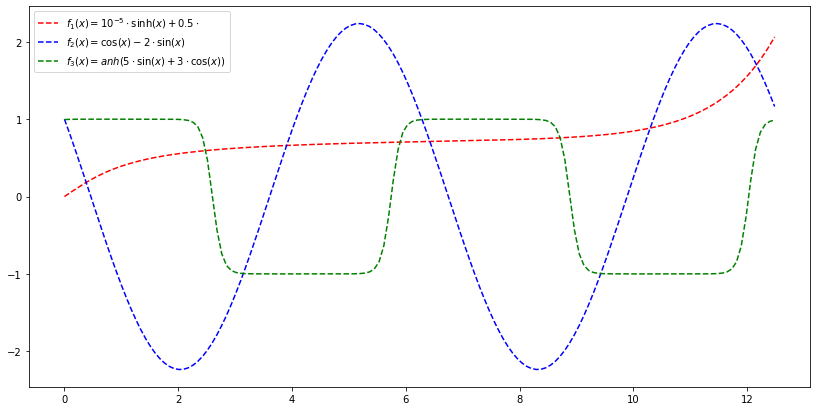

In [7]:
# Obtener 150 valores equiespaciados entre 0 y 4$\pi$
valores_equiespaciados = np.arange(0, 4 * math.pi, (4*math.pi)/150 )

def f1(value):
  p = math.pow(10, -5) * math.sinh(value) + 0.5 * math.atan(value)
  return p

def f2(value):
  p = math.cos(value) - 2 * math.sin(value)
  return p

def f3(value):
  p = math.tanh(5 * math.sin(value) + 3 * math.cos(value))
  return p

funcs = pd.DataFrame()
funcs['values'] = valores_equiespaciados


# Obtener el valor de las funciones indicadas para los 150 valores anteriormente calculados.
for i in range(3):
  y_values = []
  for v in funcs['values'].values:
    y_value = 0
    if i == 0:
      y_value = f1(v)
    if i == 1:
      y_value = f2(v)
    if i == 2:
      y_value = f3(v)
    
    y_values.append(y_value)
  if i == 0:
    funcs['f1'] = y_values
  if i == 1:
    funcs['f2'] = y_values
  if i == 2:
    funcs['f3'] = y_values


#Visualizar las tres curvas simultáneamente en el mismo plot (con líneas discontinuas en rojo, azul y verde). 
plt.figure(figsize=(14, 7))
plt.plot(funcs['values'], funcs['f1'], '--' , label = '$f_1(x)= 10^{-5}\cdot\sinh(x) + 0.5\cdot\arctan(x)$', c = 'red')
plt.plot(funcs['values'], funcs['f2'], '--', label = '$f_2(x)= \cos(x) - 2\cdot\sin(x)$', c = 'blue')
plt.plot(funcs['values'], funcs['f3'], '--', label = '$f_3(x)= \tanh(5\cdot\sin(x) + 3\cdot\cos(x))$', c = 'green')
plt.legend()
plt.show()

## Ejercicio 5: visualización de funciones 3D



*   Mostrar dos funciones 3D dentro de la misma figura. Las funciones a mostrar son las siguientes:

$f_1(x,y) =  10 - 2\cdot|x+y| + 2\cdot|y-x|$

$f_2(x,y) =  10 \cdot sin(\sqrt{x^2+y^2})$

*   Como se indicaba, ambas funciones deben mostrarse dentro de la misma figura/ventana como *surface plots*. Más concretamente, el resultado debe ser exactamente el que se muestra en la siguiente celda de resultados (tanto a nivel de título de las gráficas, como de rango de valores en los ejes y colores empleados). Esta es la única salida que proporciona este ejercicio. No se debe mostrar ninguna otra información. El siguiente enlace puede servir de ayuda y referencia a la hora de realizar este ejercicio: https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html. De cara a mostrar ecuaciones matemáticas en figuras de Matplotlib usando LaTeX la siguiente referencia puede ser de utilidad: https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html.

La función *meshgrid* puede ser de gran utilidad en este ejercicio. Véanse https://interactivechaos.com/es/manual/tutorial-de-numpy/la-funcion-meshgrid
y https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html



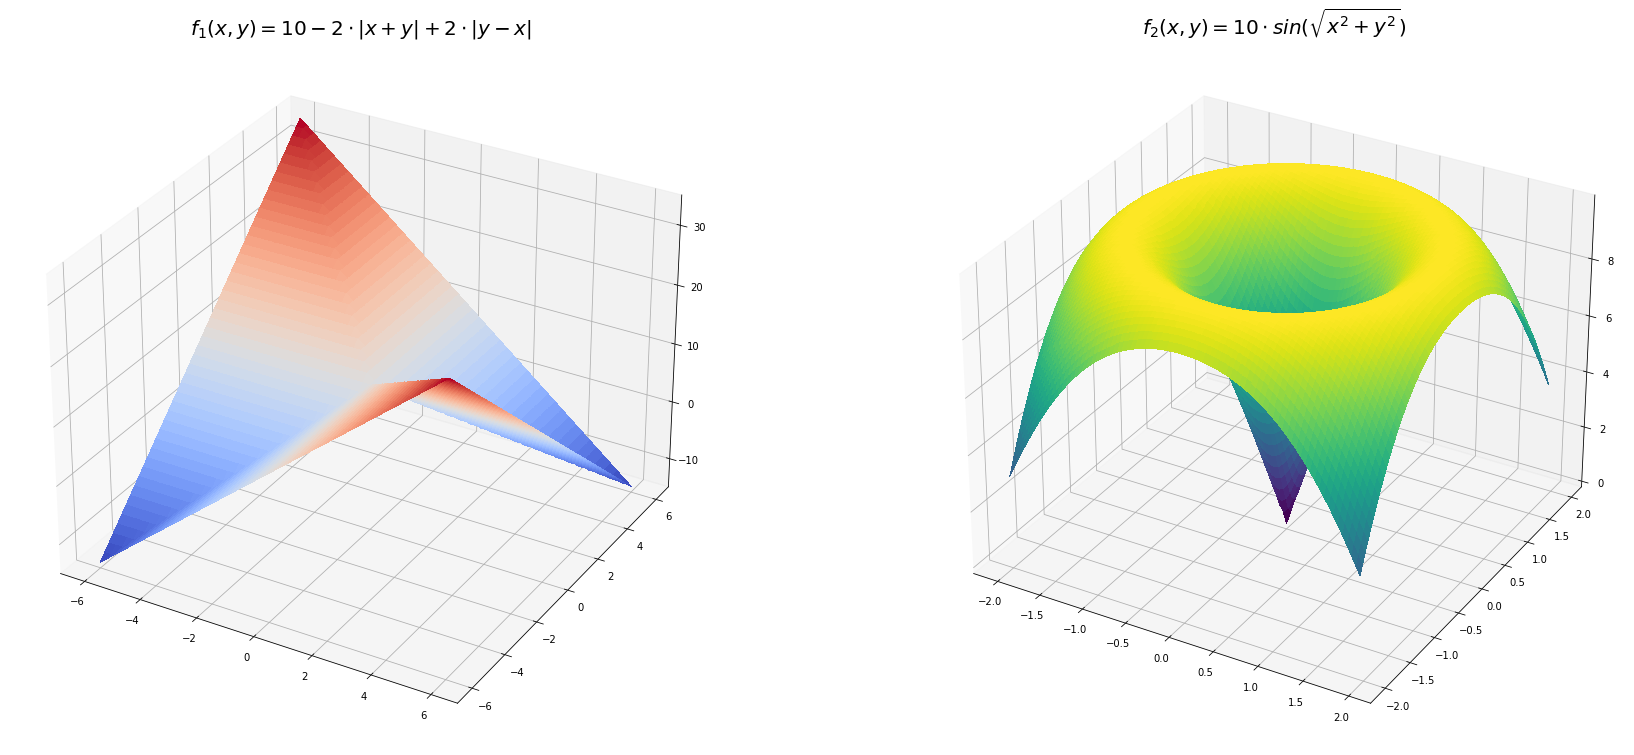

In [8]:
from numpy.core.numeric import zeros_like
from matplotlib import cm

# FUNCIONES
def f1(x, y):
  return 10 - 2 * math.fabs( x + y) + 2 * math.fabs(y - x)

def f2(x,y):
  return 10 * math.sin(math.sqrt(x * x + y * y))


## VALORES DE LA FIGURA 1
X = np.arange(-6, 6.25, 0.25)
Y = np.arange(-6, 6.25, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X.copy()
index = 0
jndex = 0
for arrX, arrY in zip(X, Y):
  jndex = 0
  for v1, v2 in zip(arrX, arrY):
    Z[index][jndex] = f1(v1, v2)
    jndex += 1
  index += 1

## VALORES DE LA FIGURA 2
X2 = np.arange(-2, 2, 0.05)
Y2 = np.arange(-2, 2, 0.05)
X2, Y2 = np.meshgrid(X2, Y2)
Z2 = X2.copy()
index = 0
jndex = 0
for arrX, arrY in zip(X2, Y2):
  jndex = 0
  for v1, v2 in zip(arrX, arrY):
    Z2[index][jndex] = f2(v1, v2)
    jndex += 1
  index += 1

params = {'fontsize': 20
 }

## COMENZAMOS EL GRÁFICO
fig = plt.figure(figsize=(30, 13))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title(r'$f_1(x,y) =  10 - 2\cdot|x+y| + 2\cdot|y-x|$', fontdict = params)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title(r'$f_2(x,y) =  10 \cdot sin(\sqrt{x^2+y^2})$', fontdict=params)
surf = ax.plot_surface(X2, Y2, Z2, rstride=1, cstride=1, cmap=cm.viridis,
                       linewidth=0, antialiased=False)

plt.show()

#NOTA: puede que Colab proporcione el siguiente error al intentar poner el título de la figura en LaTeX:
#[Errno 2] No such file or directory: 'latex': 'latex'.
#Una posible solución sería la indicada en el siguiente enlace: 
#https://stackoverflow.com/questions/55746749/latex-equations-do-not-render-in-google-colaboratory-when-using-matplotlib
#Y, más concretamente, serviría con hacer
#!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng



De cara a visualizar gráficos interactivos en Colab (es decir, que os permitan ampliar, mover o desplazaros por un gráfico) os recomiendo el uso de librerías como Altair, Plotly o Bokeh. Esta recomendación viene motivada por el hecho de que Matplotlib, del mismo modo que permite interactuar con las figuras en Spyder sin ningún problema, en Google Colab presenta un comportamiento diferente. 

En este sentido, en caso de que sea de vuestro interés, podéis explorar el siguiente cuaderno de Colab, en donde se muestran distintas técnicas y librerías de visualización: https://colab.research.google.com/notebooks/charts.ipynb